In [159]:
import pandas as pd
import matplotlib.pyplot as plt

In [194]:
df = pd.read_csv('dataset/nasdaq100.csv', sep=';')

In [195]:
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [162]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [196]:
df.drop(columns = ['Date'], inplace= True)
# df.drop('Data', axis = 1)

In [197]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'Stock Prices')

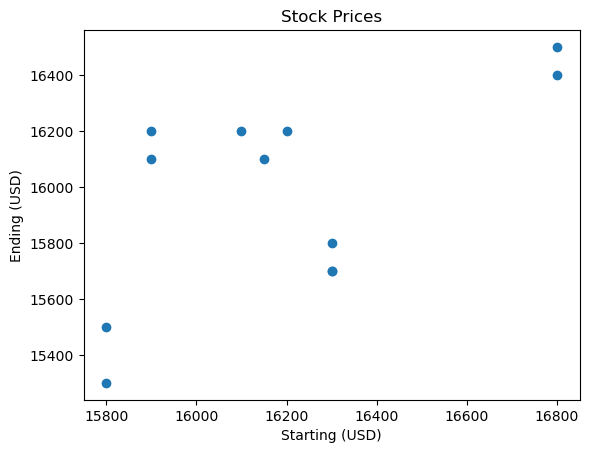

In [165]:
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')

## feature extract

In [198]:
x = df.drop('Ending (USD)' , axis = 1)

In [199]:
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [200]:
y = df[['Ending (USD)']]

In [201]:
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


# Linear Regression

In [170]:
from sklearn.linear_model import LinearRegression

In [202]:
# object
reg = LinearRegression()

In [172]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [173]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'Stock Prices')

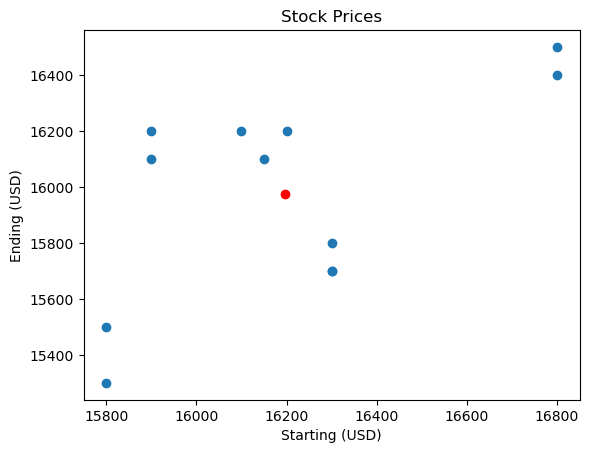

In [174]:
plt.scatter(x.mean(),y.mean(), color = 'red')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')

In [203]:
#training 
result = reg.fit(x,y)
result

LinearRegression()

during training, linear regression learns the optimal values of **`𝑚`** and **`𝑐`** that **minimize prediction error**.

**`fit()` mathematically minimizes a loss function (usually MSE) with respect to model parameters using optimization (normal equation or gradient descent).**

In [176]:
type(result)

sklearn.linear_model._base.LinearRegression

In [177]:
m = reg.coef_  # m (weight)
m

array([[0.65258293]])

In [178]:
c = reg.intercept_  # c (bias)
c

array([5405.87555702])

### **y = mx + c**

In [179]:
y = (m * 16700) + c
y

array([[16304.0105628]])

### **Show predicted_y**

In [180]:
reg.predict([[16700]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [181]:
df['predicted_y'] = reg.predict(x)
df

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
5,16800,16400,16369.268856
6,15900,16200,15781.944215
7,15800,15500,15716.685922
8,16150,16100,15945.089949
9,16300,15800,16042.977389


### **Best fit line**

Text(0.5, 1.0, 'Stock Prices')

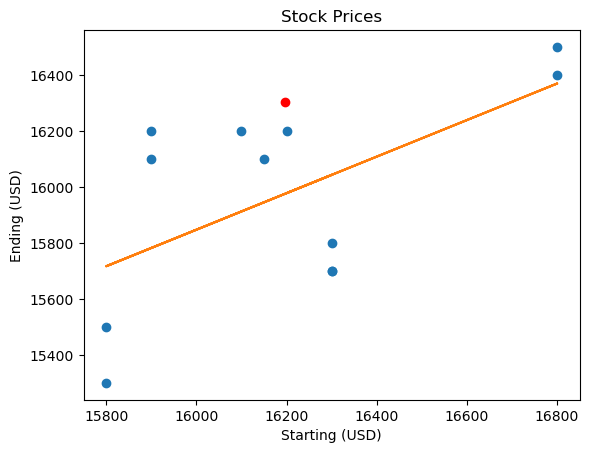

In [182]:
plt.plot(x, df['predicted_y'], color="tab:orange") # best fit line

plt.scatter(x.mean(),y.mean(), color = 'red')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')

### **Lose & Cost function**

#### **Loss function (per data point)**
A **loss function** measures **error for a single training example.**

In [183]:
# Error
# Residual
# Prediction error

df['error'] = df['Ending (USD)'] - df['predicted_y']
df

,Starting (USD),Ending (USD),predicted_y,error
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389
5,16800,16400,16369.268856,30.731144
6,15900,16200,15781.944215,418.055785
7,15800,15500,15716.685922,-216.685922
8,16150,16100,15945.089949,154.910051
9,16300,15800,16042.977389,-242.977389


For **Linear Regression**, the usual loss is **Squared Loss**

In [184]:
df['loss'] = (df['Ending (USD)'] - df['predicted_y']) ** 2
df

,Starting (USD),Ending (USD),predicted_y,error,loss
0,16800,16500,16369.268856,130.731144,17090.631947
1,15900,16100,15781.944215,318.055785,101159.482234
2,15800,15300,15716.685922,-416.685922,173627.157401
3,16100,16200,15912.460802,287.539198,82678.790322
4,16300,15700,16042.977389,-342.977389,117633.489371
5,16800,16400,16369.268856,30.731144,944.403196
6,15900,16200,15781.944215,418.055785,174770.639191
7,15800,15500,15716.685922,-216.685922,46952.788693
8,16150,16100,15945.089949,154.910051,23997.123951
9,16300,15800,16042.977389,-242.977389,59038.011569


#### **Cost function (over entire dataset)**

A **cost function** aggregates the loss over **all training examples.**
**Mean Squared Error (MSE)**

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [186]:
# MSE 
mse = mean_squared_error(df['Ending (USD)'],df['predicted_y'])
mse

80411.23397700385

In [187]:
# MAE
mae = mean_absolute_error(df['Ending (USD)'],df['predicted_y'])
mae

260.3840017604666

### **R2 Squared Value/ Accueacy for prediction**

In [204]:
r2_score(y, reg.predict(x))

0.3577804940272571